# Applied Data Science (2021-FS) - Projektarbeit

### Autoren:
<ul>
<li>Coviello Roberto | cove@zhaw.ch</li>
<li>Hauser Jonas | hausejo1@students.zhaw.ch</li>
<li>Singh Manpreet | singhma3@students.zhaw.ch</li>
</ul>

## Klassifizierung von Bildern von Essen mittels Tensorflow

## Inhaltsverzeichnis
<ul>
<li>Webscraping der Bilder von Essen</li>
<li>Datenaufbereitung und Visualisierung</li>
<li>Aufteilen der Daten in Train und Test</li>
</ul>

In [1]:
!pip install opencv-python
!pip install tqdm

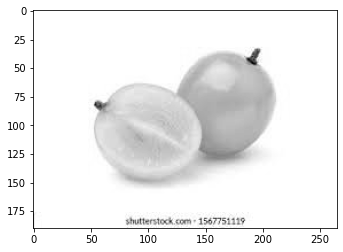

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

#DATADIR = "/Users/jonas/Downloads/Screenscraping"
DATADIR = "C:\\Users\\manpr\\OneDrive - ZHAW\\FS2021\\Applied Data Science\\Leistungsnachweis\\food-classifier\\food"

DATADIRTRAINING = DATADIR + "/Testing"
DATADIRTESTING = DATADIR + "/Training"
try:
        os.mkdir(DATADIRTRAINING)
        os.mkdir(DATADIRTESTING)
except:
        pass
# CATEGORIES = ["grapes", "lasagna", "pancakes", "pizza", "ramen", "risotto", "salad", "steak", "sushi", "tacos"]
CATEGORIES = ["grapes", "lasagna", "pancakes", "pizza"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path zu all den Kategorien
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [45]:
print(img_array.shape)

(190, 265)


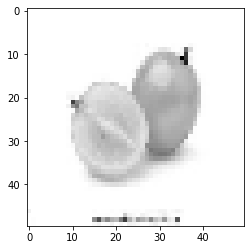

In [46]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

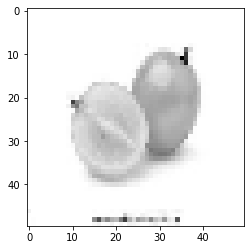

In [47]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [48]:
x = round(3.2)
print(x)

3


In [49]:
import os
import random
from shutil import copyfile
print('Welcher Anteil der Daten soll zum Testing verwendet werden?:')
anteiltesting = float(input())

for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path zu all den Kategorien
        arr = os.listdir(path)
        length = len(arr) #how many pictures does the current category have?
        print('Diese Menge an Bildern ist vorhanden: ' + str(length))
        
        lengthtraining = round(length * (1-anteiltesting)) #Berechnung Anzahl Trainingsdaten
        lengthtesting = round(length * (anteiltesting)) #Berechnung Anzahl Testingdaten
        print('Anzahl Trainingbilder für ' + category + ': ' + str(lengthtraining))
        print('Anzahl Testingbilder für ' + category + ': ' + str(lengthtesting))
        reversearr = arr[::-1] 
    
        origin = path
    
        try:
            os.mkdir(DATADIRTRAINING + '/' + category)
            os.mkdir(DATADIRTESTING + '/' + category)
        except:
            pass
        for i in range(lengthtraining):
            copyfile((origin +'/' + arr[i]), (DATADIRTRAINING + '/' + category + '/' + arr[i]))
        for i in range(lengthtesting):
            copyfile((origin +'/' + reversearr[i]), (DATADIRTESTING + '/' + category +'/' + reversearr[i]))

Welcher Anteil der Daten soll zum Testing verwendet werden?:


 0.6


Diese Menge an Bildern ist vorhanden: 410
Anzahl Trainingbilder für grapes: 164
Anzahl Testingbilder für grapes: 246
Diese Menge an Bildern ist vorhanden: 199
Anzahl Trainingbilder für lasagna: 80
Anzahl Testingbilder für lasagna: 119


In [50]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

100%|██████████| 199/199 [00:00<00:00, 381.23it/s]


In [51]:
print(len(training_data))

609


In [52]:
import random

random.shuffle(training_data)

In [53]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
0
0
0
0
0


In [54]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[219]
   [219]
   [217]
   ...
   [226]
   [214]
   [233]]

  [[215]
   [220]
   [210]
   ...
   [166]
   [206]
   [193]]

  [[214]
   [211]
   [210]
   ...
   [ 40]
   [ 98]
   [150]]

  ...

  [[224]
   [224]
   [228]
   ...
   [102]
   [ 98]
   [197]]

  [[226]
   [225]
   [226]
   ...
   [213]
   [189]
   [176]]

  [[223]
   [224]
   [222]
   ...
   [194]
   [183]
   [183]]]]


In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X=np.array(X/255.0)
y=np.array(y)

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=12, epochs=3, validation_split=0.1)

Epoch 1/3
46/46 [==============================] - 15s 299ms/step - loss: 0.0000e+00 - accuracy: 0.6760 - val_loss: 0.0000e+00 - val_accuracy: 0.6393
Epoch 2/3
46/46 [==============================] - 15s 328ms/step - loss: 0.0000e+00 - accuracy: 0.6969 - val_loss: 0.0000e+00 - val_accuracy: 0.6393
Epoch 3/3
46/46 [==============================] - 16s 342ms/step - loss: 0.0000e+00 - accuracy: 0.6851 - val_loss: 0.0000e+00 - val_accuracy: 0.6393
